In [144]:
# prompt: wiener filter from scratch

import numpy as np
from scipy import signal

def wiener_filter(degraded, kernel, noise_power):
  """
  Performs Wiener filtering on a degraded image.

  Args:
    degraded: The degraded image.
    kernel: The blur kernel.
    noise_power: The noise power.

  Returns:
    The restored image.
  """

  # Calculate the frequency response of the kernel.
  kernel_freq = np.fft.fft2(kernel)

  # Calculate the frequency response of the degraded image.
  degraded_freq = np.fft.fft2(degraded)

  # Calculate the Wiener filter.
  wiener_filter = np.conj(kernel_freq) / (np.abs(kernel_freq)**2 + noise_power)

  # Apply the Wiener filter to the degraded image.
  restored_freq = wiener_filter * degraded_freq

  # Calculate the restored image.
  restored = np.fft.ifft2(restored_freq)

  return restored


In [2]:
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import gaussian, convolve2d

def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy


In [111]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.util import img_as_float

In [112]:
from PIL import Image
import io
import requests
def url_to_numpy(url):
  img = Image.open(io.BytesIO(requests.get(url).content))
  img =  cv.cvtColor(np.array(img),cv.COLOR_RGB2GRAY)
  needed = img.shape[1] - img.shape[0]
  img = cv.copyMakeBorder(img, needed//2, needed//2, 0, 0, cv.BORDER_CONSTANT)
  return img

In [145]:
image_original = cv.imread("cat2.jpg")
image_original = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
image_original = image_original[:, :-2]

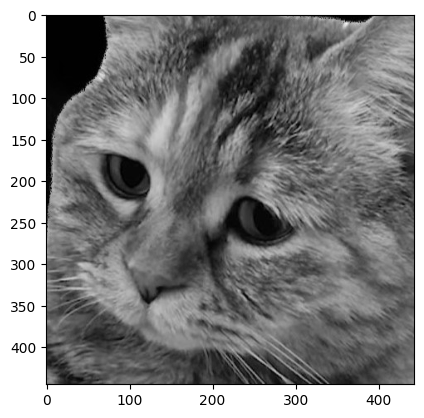

In [146]:
plt.imshow(image_original,cmap='gray')

In [153]:
noise = (np.random.normal(0,20,image_original.shape))
image_int = image_original + noise

In [154]:
image = img_as_float(image_int)

In [155]:
from skimage import io, color, util

In [156]:
A = np.identity(3)

In [157]:
A = A/image_int.shape[0]

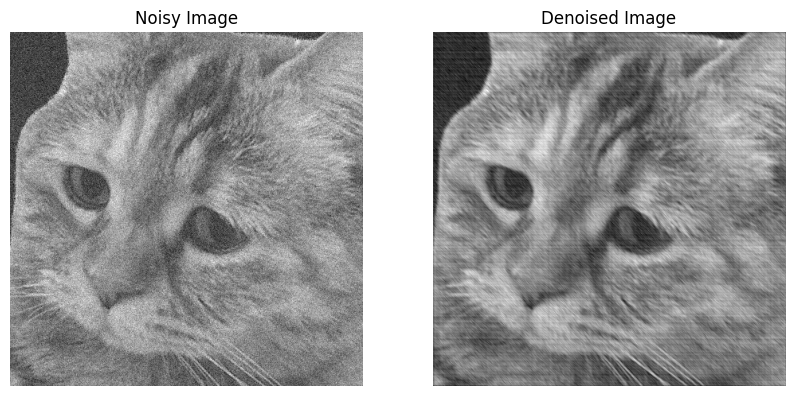

In [158]:
import numpy as np
from scipy.signal import fftconvolve
from scipy.fft import fft2, ifft2

def estimate_psd(image, kernel):
    # Compute the PSD of the convolution of the kernel with the image
    conv_image = fftconvolve(image, kernel, mode='same')
    psd_conv = np.abs(fft2(conv_image)) ** 2 / np.prod(image.shape)

    noise = image - conv_image
    psd_noise = np.abs(fft2(noise)) ** 2 / np.prod(image.shape)

    return psd_conv, psd_noise

def wiener_filter(image, kernel, noise_psd, signal_psd):
    filter = signal_psd / (signal_psd + noise_psd)
    filtered_image_freq = fft2(image) * filter
    filtered_image = np.real(ifft2(filtered_image_freq))
    return filtered_image

import matplotlib.pyplot as plt
from skimage import io, color, util

noisy_image = util.img_as_float(image)

kernel = A
observed_image_psd, noise_psd = estimate_psd(noisy_image, kernel)
denoised_image = wiener_filter(noisy_image, kernel, noise_psd, observed_image_psd)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')
plt.show()


In [159]:
cv.PSNR(image_original, noisy_image.astype(np.uint8))

15.063516301581073

In [160]:
cv.PSNR(image_original, denoised_image.astype(np.uint8))

9.422953847753897

  6%|▌         | 6/100 [00:00<00:03, 28.28it/s]

81582.00040526134
112663.58792300077
139912.11960512857
164724.28950849766
187800.44246040052
209547.0616399015
230224.8578274847


 10%|█         | 10/100 [00:00<00:02, 30.54it/s]

250013.74459431256
269044.7719072676
287417.3992913193
305209.57389294275
322483.9699224125


 14%|█▍        | 14/100 [00:00<00:03, 23.71it/s]

339292.0383957802
355676.7399849063
371674.4521209183
387316.3402508692


 20%|██        | 20/100 [00:00<00:03, 20.70it/s]

402629.37057888677
417637.0758126725
432360.14585484593
446816.8911394236
461023.6112136882
474994.8915288862


 24%|██▍       | 24/100 [00:01<00:03, 22.52it/s]

488743.8450456646
502282.3109075394
515621.0193555108
528769.7298242679


 30%|███       | 30/100 [00:01<00:03, 20.76it/s]

541737.3475176021
554532.0225406142
567161.2347539722
579631.8668289114


 33%|███▎      | 33/100 [00:01<00:03, 20.23it/s]

591950.2674618773
604122.3063123206
616153.4219254026
628048.6636704582
639812.728548494


 39%|███▉      | 39/100 [00:01<00:02, 21.05it/s]

651449.9935839986
662964.544407218
674360.2005446083
685640.5378616266
696808.9085394603


 45%|████▌     | 45/100 [00:02<00:02, 22.01it/s]

707868.4589132487
718822.1454523685
729672.7491225337
740422.8883341507
751075.0306511363


 48%|████▊     | 48/100 [00:02<00:02, 22.69it/s]

761631.5034086345
772094.5033663368
782466.1055058267
792748.2710650322
802942.8548900364


 54%|█████▍    | 54/100 [00:02<00:02, 22.36it/s]

813051.61217374
823076.2046418948
833018.2062395224
842879.1083645229
852660.3246901202
862363.1956135442


 60%|██████    | 60/100 [00:02<00:01, 23.55it/s]

871988.9923648345
881538.9208066928
891014.1249538035
900415.6902377689
909744.6465417655


 66%|██████▌   | 66/100 [00:02<00:01, 22.82it/s]

919001.971026976
928188.5907709198
937305.3852357807
946353.1885828817
955332.7918475092


 69%|██████▉   | 69/100 [00:03<00:01, 20.52it/s]

964244.944986459
973090.3588089641
981869.7068001754
990583.626845046


 74%|███████▍  | 74/100 [00:03<00:01, 18.35it/s]

999232.7228594606
1007817.5663345916
1016338.6977999042
1024796.6282097802
1033191.8402584663


 81%|████████  | 81/100 [00:03<00:00, 22.62it/s]

1041524.7896278792
1049795.9061726527
1058005.595046728
1066154.2377756753
1074242.1932787665
1082269.7988446935


 84%|████████▍ | 84/100 [00:03<00:00, 22.58it/s]

1090237.371064563
1098145.2067255776
1105993.5836685237
1113782.7616119129


 90%|█████████ | 90/100 [00:04<00:00, 22.49it/s]

1121512.9829453058
1129184.4734940797
1136797.443257647
1144352.0871228653
1151848.5855542098


 97%|█████████▋| 97/100 [00:04<00:00, 26.48it/s]

1159287.1052620893
1166667.799850558
1173990.8104455709
1181256.26630487
1188464.2854105125
1195614.9750450389
1202708.4323522472


100%|██████████| 100/100 [00:04<00:00, 22.24it/s]


1209744.7448835066
1216723.9911305516
1223646.241045635


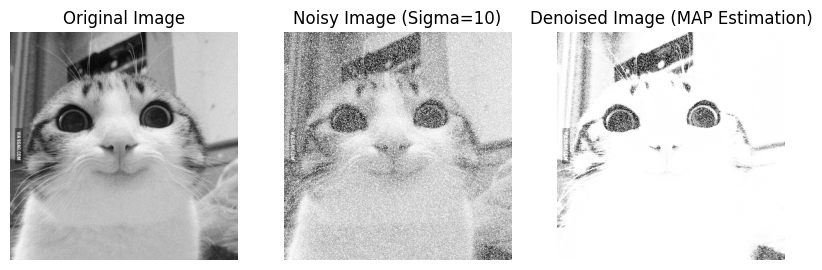

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from tqdm import tqdm

def gaussian_noise(image, sigma):
    """Add Gaussian noise to the image."""
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = cv.add(image,noise)
    return noisy_image

def gaussian_kernel(size, sigma):
    """Generate a Gaussian kernel."""
    x = np.arange(-size//2 + 1, size//2 + 1)
    y = np.arange(-size//2 + 1, size//2 + 1)
    x, y = np.meshgrid(x, y)
    kernel = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
    return kernel / kernel.sum()

def likelihood(noisy_image, clean_image, noise_sigma):
    """Calculate the likelihood of observing the noisy image given the clean image."""
    # Calculate the difference between the noisy image and the clean image
    diff = noisy_image - clean_image
    # Calculate the squared difference
    diff_squared = diff ** 2
    # Calculate the likelihood using the Gaussian probability density function
    likelihood = (1 / np.sqrt(2 * np.pi * noise_sigma**2)) * np.exp(-(diff_squared) / (2 * noise_sigma**2))
    return likelihood

def gaussian_prior(clean_image, prior_mean, prior_var):
    """Calculate the Gaussian prior probability for the clean image."""
    # Calculate the likelihood using the Gaussian probability density function
    prior_prob = (1 / np.sqrt(2 * np.pi * prior_var)) * np.exp(-((clean_image - prior_mean)**2) / (2 * prior_var))
    return prior_prob



def map_estimation(noisy_image, kernel, noise_var, prior_var, num_iterations=100, step_size=0.1):
    """Perform MAP estimation for image denoising."""
    # Initialize the estimate of the clean image
    clean_image = noisy_image.copy()

    # Perform iterations of gradient descent
    for _ in tqdm(range(num_iterations)):
        # convolved_image = convolve2d(clean_image, kernel, mode='same', boundary='wrap')

        likelihood_gradient = likelihood(noisy_image,clean_image,prior_var)

        prior_var += step_size*gaussian_prior(clean_image,clean_image.mean(),prior_var)

        clean_image += step_size * (likelihood_gradient + prior_var)
        print(np.sum(prior_var))

    return clean_image



# Add Gaussian noise to the image
sigma = 10
noisy_image = image.copy()
# Generate a Gaussian kernel
kernel_size = 3
sigma_kernel = 1
kernel = gaussian_kernel(kernel_size, sigma_kernel)
# kernel = np.random.normal(1,sigma_kernel,(kernel_size,kernel_size))

# Set noise variance and prior variance
noise_var = sigma**2
prior_var = 0.1

# Perform MAP estimation for image denoising
denoised_image = map_estimation(noisy_image, kernel, noise_var, prior_var)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_original, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Noisy Image (Sigma={})".format(sigma))
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Denoised Image (MAP Estimation)")
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')
plt.show()


In [106]:
cv.PSNR(image_original.astype(np.float64), noisy_image)

3.665910126343105

In [107]:
cv.PSNR(image_original.astype(np.float64), denoised_image)

3.6539285453665387

In [81]:
cv.PSNR(image_original.astype(np.float64), denoised_image)

4.726881566772744